# Capstone week 3

Installing the required packages

In [1]:
!pip install lxml
!pip3 install html5lib
!pip3 install BeautifulSoup4
!pip3 install pandas
import pandas as pd
import numpy as np
import html5lib

     |████████████████████████████████| 5.5MB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 6.1 MB/s eta 0:00:01�                  | 4.3 MB 6.1 MB/s eta 0:00:02
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)
     |████████████████████████████████| 14.5 MB 511 kB/s  eta 0:00:01                   | 2.2 MB 40.4 MB/s eta 0:00:01��██████████████▋             | 8.5 MB 40.4 MB/s eta 0:00:01


Getting the tables from the wikipedia web page and create a dataframe from the table containing the post codes

In [19]:
postalcode= pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
Pc=postalcode[0]

Removal of 'Not assigned' Boroughs

In [20]:
Pc=Pc[Pc['Borough'] !='Not assigned']
print(Pc[Pc['Neighbourhood'] =='Not assigned'] )


Empty DataFrame
Columns: [Postal Code, Borough, Neighbourhood]
Index: []


No neighbourhood is "not assigned"

Print the shape of the dataframe as required

In [21]:
Pc.shape

(103, 3)

In [4]:
!pip install geocoder
import geocoder # import geocoder

# initialize your variable to None


     |████████████████████████████████| 102kB 6.6MB/s ta 0:00:011
     |████████████████████████████████| 829kB 4.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


In [12]:
lat_lng_coords = None

# loop until you get the coordinates
g1 = geocoder.google('Paris',sensor=False)
print(g1)
#while(lat_lng_coords is None):
g = geocoder.google('{}, Toronto, Ontario'.format('M1B'))
print(g)
lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

<[REQUEST_DENIED] Google - Geocode [empty]>
<[REQUEST_DENIED] Google - Geocode [empty]>


TypeError: 'NoneType' object is not subscriptable

correct syntax but the result is always empty so I will use the csv file

In [22]:
dfcoor=pd.read_csv('Geospatial_Coordinates.csv')
dfcoor

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


Sorting of the neighbourhoods dataframe so that it is in the postal code order

In [23]:
Pc=Pc.sort_values(by = 'Postal Code', ascending= True)
Pc.reset_index(inplace=True)
print(Pc)

     index Postal Code      Borough  \
0        9         M1B  Scarborough   
1       18         M1C  Scarborough   
2       27         M1E  Scarborough   
3       36         M1G  Scarborough   
4       45         M1H  Scarborough   
..     ...         ...          ...   
98      98         M9N         York   
99     107         M9P    Etobicoke   
100    116         M9R    Etobicoke   
101    143         M9V    Etobicoke   
102    152         M9W    Etobicoke   

                                         Neighbourhood  
0                                       Malvern, Rouge  
1               Rouge Hill, Port Union, Highland Creek  
2                    Guildwood, Morningside, West Hill  
3                                               Woburn  
4                                            Cedarbrae  
..                                                 ...  
98                                              Weston  
99                                           Westmount  
100  Kingsview Vil

merging...

In [24]:
Pc[['Latitude', 'Longitude']]=dfcoor[['Latitude', 'Longitude']]


In [15]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

build a first map to see the points

In [25]:
la=43.657952 
lon =-79.387383
toronto_map = folium.Map(location=[la, lon], zoom_start=12)
neib = folium.map.FeatureGroup()
for lat, lng, neighborhood, borough in zip(Pc.Latitude, Pc.Longitude, Pc.Neighbourhood, Pc.Borough):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            popup=label,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
    ).add_to(toronto_map)
display(toronto_map)

train the kmean algorithm to find the optimal k

9.749732512912647
7.3406004520087915
5.515734664724644
4.76453926960644
4.288638453831322
3.8480030533937843
3.629903497488835
3.352304712890037
3.123377127451384


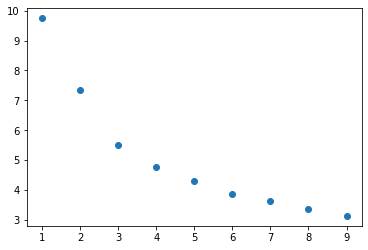

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k=range(1, 10)
results= np.zeros(9)
toronto_clustering = Pc[['Latitude','Longitude']]
# run k-means clustering
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(toronto_clustering)
    Pc['cluster']=kmeans.labels_
    kmeans2 = KMeans(n_clusters=i, random_state=0).fit_transform (toronto_clustering)
    result = sum(min(a) for a in kmeans2)
    print(result)
    results[i-1]=result
plt.scatter(k,results)
plt.show()

a slight elbow point can be noticed at k=3


so the final map willbe divided in 3 clusters

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(toronto_clustering)
Pc['cluster']=kmeans.labels_
kmeans2 = KMeans(n_clusters=i, random_state=0).fit_transform (toronto_clustering)

In [31]:
toronto_map_cl = folium.Map(location=[la, lon], zoom_start=12)
neib = folium.map.FeatureGroup()
colorlist=['yellow', 'green', 'blue', 'red', 'black', 'purple']
for lat, lng, neighborhood, borough, cluster in zip(Pc.Latitude, Pc.Longitude, Pc.Neighbourhood, Pc.Borough, Pc.cluster):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    cl = colorlist[cluster]
    folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            popup=label,
            color=cl,
            fill=True,
            fill_color=cl,
            fill_opacity=0.6
    ).add_to(toronto_map_cl)
display(toronto_map_cl)

We can notice a dense city center and two less dense clusters east and west